In [1]:
# Importamos las herramientas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Esto es para que los gráficos tengan un estilo más elegante por defecto
sns.set(style="whitegrid")

In [2]:
import kagglehub
import pandas as pd
import os

# 1. Descargar la última versión del dataset
# Esto devuelve la RUTA (path) donde se ha guardado la carpeta en tu ordenador
path_folder = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("📂 La carpeta del dataset está en:", path_folder)

# 2. Construir la ruta al archivo CSV exacto
# Kagglehub te da la carpeta, nosotros le añadimos el nombre del archivo
csv_path = os.path.join(path_folder, 'Student_Performance.csv')

# 3. Cargar con Pandas
df = pd.read_csv(csv_path)

# Comprobamos que funciona
print("✅ ¡Dataset cargado con éxito!")
display(df.head())

100%|██████████| 48.5k/48.5k [00:00<00:00, 12.2MB/s]

Extracting files...
📂 La carpeta del dataset está en: C:\Users\gemit\.cache\kagglehub\datasets\nikhil7280\student-performance-multiple-linear-regression\versions\1
✅ ¡Dataset cargado con éxito!


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# 1. Ver el resumen técnico (tipos de datos y cuántos hay)
print("--- INFORMACIÓN ---")
df.info()

# 2. Contar si hay huecos vacíos (nulos)
print("\n--- ¿HAY HUECOS VACÍOS? ---")
print(df.isnull().sum())

# 3. Ver si hay filas repetidas
print(f"\nFilas duplicadas: {df.duplicated().sum()}")

--- INFORMACIÓN ---
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  str    
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), str(1)
memory usage: 468.9 KB

--- ¿HAY HUECOS VACÍOS? ---
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Filas duplicadas: 127


In [4]:
# Buscamos las filas que son idénticas entre sí
# keep=False nos muestra TODAS las copias (el original y la copia)
duplicados = df[df.duplicated(keep=False)]

# Las ordenamos para verlas pareadas una debajo de otra
duplicados_ordenados = duplicados.sort_values(by=list(df.columns))

print("Aquí tienes ejemplos de alumnos 'clonados':")
display(duplicados_ordenados.head(10))

Aquí tienes ejemplos de alumnos 'clonados':


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6975,1,41,No,7,3,12.0
9966,1,41,No,7,3,12.0
2225,1,42,Yes,9,7,17.0
4986,1,42,Yes,9,7,17.0
2647,1,57,No,8,0,31.0
8522,1,57,No,8,0,31.0
3398,1,63,Yes,8,3,37.0
8184,1,63,Yes,8,3,37.0
4573,1,66,No,8,2,40.0
5578,1,66,No,8,2,40.0


In [5]:
# 1. Eliminamos duplicados
df = df.drop_duplicates()
print("¡Duplicados eliminados!")

# 2. Transformamos "Yes/No" a "1/0"
# Esto le dice: "Donde ponga 'Yes' pon un 1, donde ponga 'No' pon un 0"
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Comprobamos que ha cambiado
df.head()

¡Duplicados eliminados!


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
# Preparamos un "lienzo" con 2 espacios (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# GRÁFICO 1: Esfuerzo (Horas vs Nota)
# Usamos 'regplot' que dibuja los puntos Y una línea de tendencia
sns.regplot(ax=axes[0], x='Hours Studied', y='Performance Index', data=df, line_kws={'color':'red'})
axes[0].set_title('Impacto de Estudiar (Esfuerzo)')

# GRÁFICO 2: Base (Notas Anteriores vs Nota)
sns.regplot(ax=axes[1], x='Previous Scores', y='Performance Index', data=df, line_kws={'color':'green'})
axes[1].set_title('Impacto de la Base (Talento)')

plt.show()

¿Cómo influyen las Horas y las Notas Anteriores en la Nota Final?

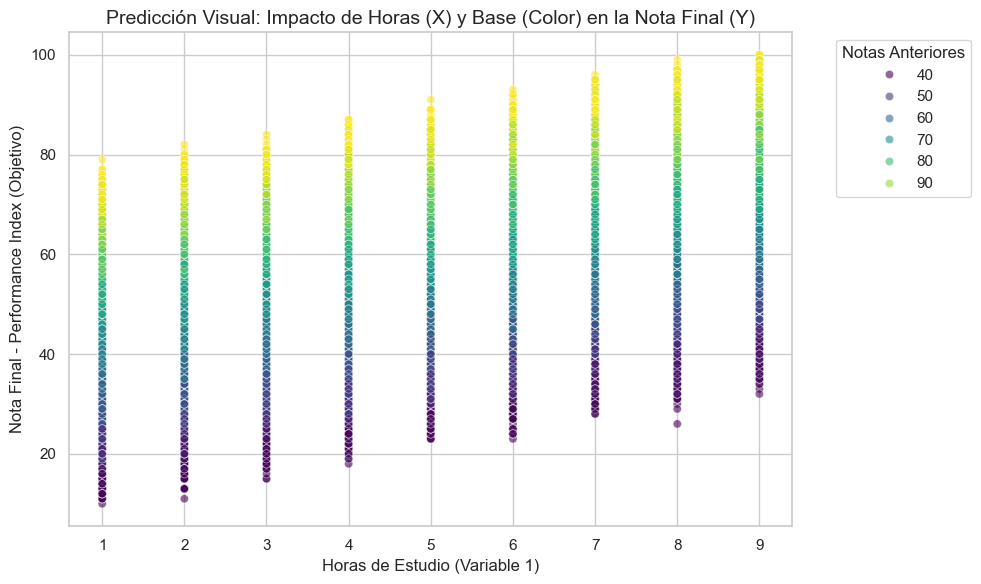


🔎 ANÁLISIS DEL GRÁFICO:
Observamos que para un mismo nivel de horas de estudio (eje X), la nota final (eje Y) varía muchísimo.
Esa variación se explica perfectamente por el color (Notas Anteriores).
Conclusión: Para una predicción exacta, el modelo necesita obligatoriamente ambas variables.


In [6]:
plt.figure(figsize=(10, 6))

# Usamos un Scatter Plot con 3 dimensiones:
# X = Horas de Estudio
# Y = Nota Final (Lo que queremos predecir)
# Hue (Color) = Notas Anteriores (La base del alumno)
sns.scatterplot(
    data=df, 
    x='Hours Studied', 
    y='Performance Index', 
    hue='Previous Scores', 
    palette='viridis',  # 'viridis' es una escala de colores muy clara (morado a amarillo)
    alpha=0.6           # Transparencia para ver si hay puntos superpuestos
)

plt.title('Predicción Visual: Impacto de Horas (X) y Base (Color) en la Nota Final (Y)', fontsize=14)
plt.xlabel('Horas de Estudio (Variable 1)')
plt.ylabel('Nota Final - Performance Index (Objetivo)')
plt.legend(title='Notas Anteriores', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Conclusión escrita automática
print("\n🔎 ANÁLISIS DEL GRÁFICO:")
print("Observamos que para un mismo nivel de horas de estudio (eje X), la nota final (eje Y) varía muchísimo.")
print("Esa variación se explica perfectamente por el color (Notas Anteriores).")
print("Conclusión: Para una predicción exacta, el modelo necesita obligatoriamente ambas variables.")

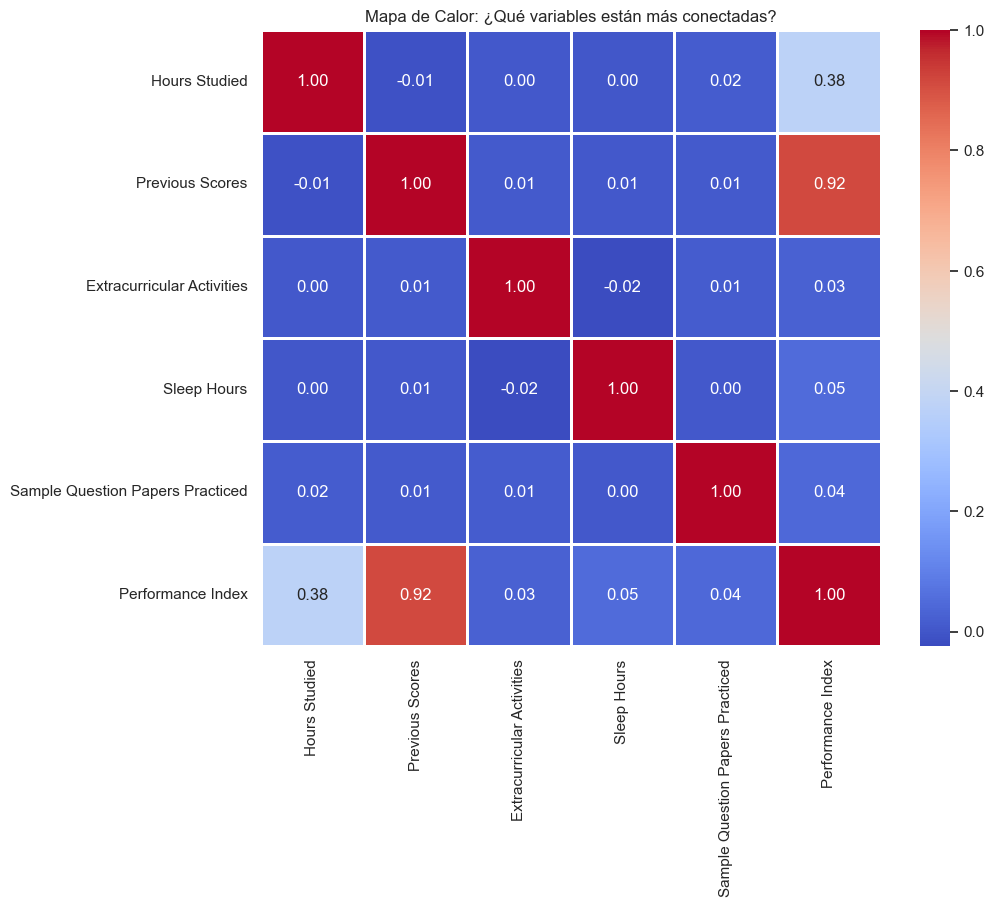

Interpretación:
- Los cuadros ROJOS indican que las variables suben juntas.
- Los cuadros AZULES (si los hubiera) indican que cuando una sube, la otra baja.
- El 0.92 entre 'Previous Scores' y 'Performance Index' es la relación más fuerte.


In [ ]:
# PASO 6: El Mapa de Calor (Todas las variables a la vez)
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del tamaño
plt.figure(figsize=(10, 8))

# Generamos el mapa
# annot=True: para ver los numeritos dentro
# cmap='coolwarm': para que use colores rojo/azul
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)

plt.title('Mapa de Calor: ¿Qué variables están más conectadas?')
plt.show()

print("Interpretación:")
print("- Los cuadros ROJOS indican que las variables suben juntas.")
print("- Los cuadros AZULES  indican que cuando una sube, la otra baja.")
print("- El 0.92 entre 'Previous Scores' y 'Performance Index' es la relación más fuerte.")